### Dependencies
___

In [4]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

from nltk.corpus import words
from matplotlib import rcParams

%matplotlib inline

### Default ploting style
_____

In [5]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(20,6)})

### Support Functions
________________


In [6]:
def get_shifted_letter(new_key, letter):
    
    cypher_alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    return (cypher_alpha[new_key] if letter in cypher_alpha else letter)    

def encrypt(key, message):
    cypher_alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    message = message.upper()
    result = ""

    for letter in message:
        new_key = (cypher_alpha.find(letter) + key) % len(cypher_alpha)
        result = result + get_shifted_letter(new_key, letter)

    return result

def decrypt(key, message):
    cypher_alpha = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"

    message = message.upper()
    result = ""

    for letter in message:
        new_key = (cypher_alpha.find(letter) - key) % len(cypher_alpha)
        result = result + get_shifted_letter(new_key, letter)

    return result


### Natural Language Toolkit Dictionary
____

In [7]:
nltk.download('words')

[nltk_data] Downloading package words to /home/spark/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

## Load letter frequency report file (Encrypted-1.txt)
_______________


In [8]:
dataset = "../resources/Encrypted-1_frequency_letters.csv"

letters = pd.read_csv(dataset)
letters.head(5)

,letter,percentage,occurrences,representations
0,C,0.031683,2135,C
1,N,0.061482,4143,N
2,E,0.051257,3454,E
3,G,0.066052,4451,G
4,V,0.052964,3569,V


### Filtering and Sorting the dataset
______

In [9]:
cond = letters['letter'].str.contains('[A-Z]')
ceaser_letters = letters[cond].copy(deep=True)

ceaser_letters.sort_values(by=['occurrences'],ascending=False, inplace=True)

### Load English letter frequency datasource
_______________


In [10]:
dataset = "../resources/letter_frequency_en_US.csv"

en_letters = pd.read_csv(dataset)
en_letters.head(5)

,letter,count
0,E,21912
1,T,16587
2,A,14810
3,O,14003
4,I,13318


### Plot letter analysis
_____

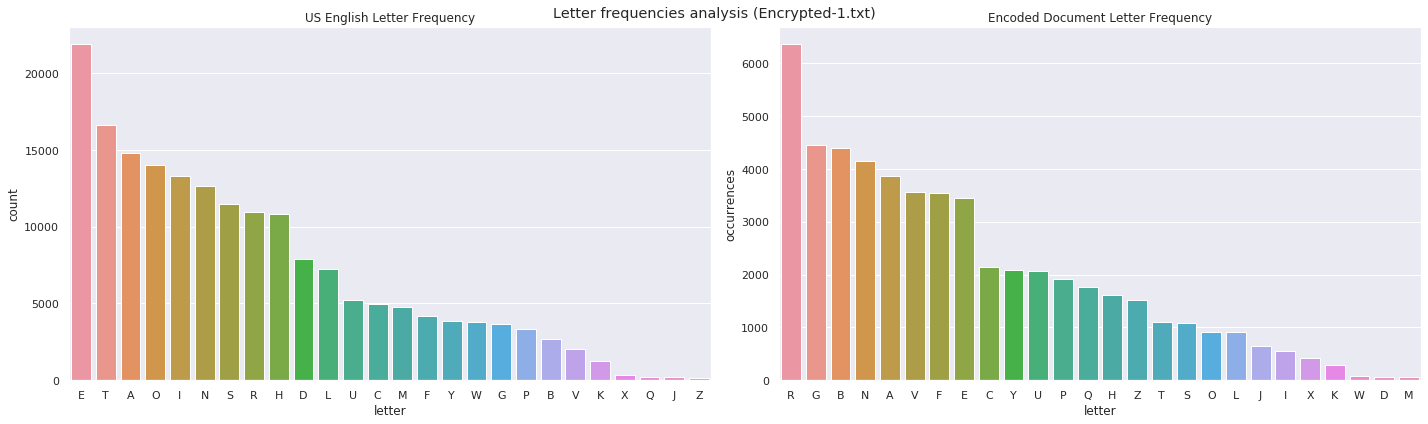

In [11]:
fig, ax = plt.subplots(1, 2)

fig.suptitle('Letter frequencies analysis (Encrypted-1.txt)')

ax[0].set_title('US English Letter Frequency')
ax[1].set_title('Encoded Document Letter Frequency')

sns.barplot(x='letter', y='count', data=en_letters, ax=ax[0])
sns.barplot(x='letter', y='occurrences', data=ceaser_letters, ax=ax[1])

fig.tight_layout()

fig.savefig('../output/images/frequencies_analysis_Encrypted-1.png')

In [157]:
print (f"Shift of the most frequency letter : {ord(ceaser_letters['letter'].head(1).values[0]) - ord(en_letters['letter'].head(1).values[0])}")

Shift of the most frequency letter : 13


### Decoding a sample string using key size provided by the plot
________

In [12]:
sample = "CNEGVPHYNE CREVBQ BS SYNXVARFF BA VOZ"

print(decrypt(13, sample))

PARTICULAR PERIOD OF FLAKINESS ON IBM


## Load letter frequency report file (Encrypted-2.txt)
_______________

In [13]:
dataset = "../resources/Encrypted-2_frequency_letters.csv"

letters = pd.read_csv(dataset)
letters.head(5)

,letter,percentage,occurrences,representations
0,M,0.091786,9131,M
1,B,0.070355,6999,B
2,F,0.023633,2351,F
3,X,0.129180,12851,X
4,L,0.064696,6436,L


### Filtering and Sorting the dataset
______

In [14]:
cond = letters['letter'].str.contains('[A-Z]')
ceaser_letters = letters[cond].copy(deep=True)

ceaser_letters.sort_values(by=['occurrences'],ascending=False, inplace=True)

### Plotting letter analysis
_____

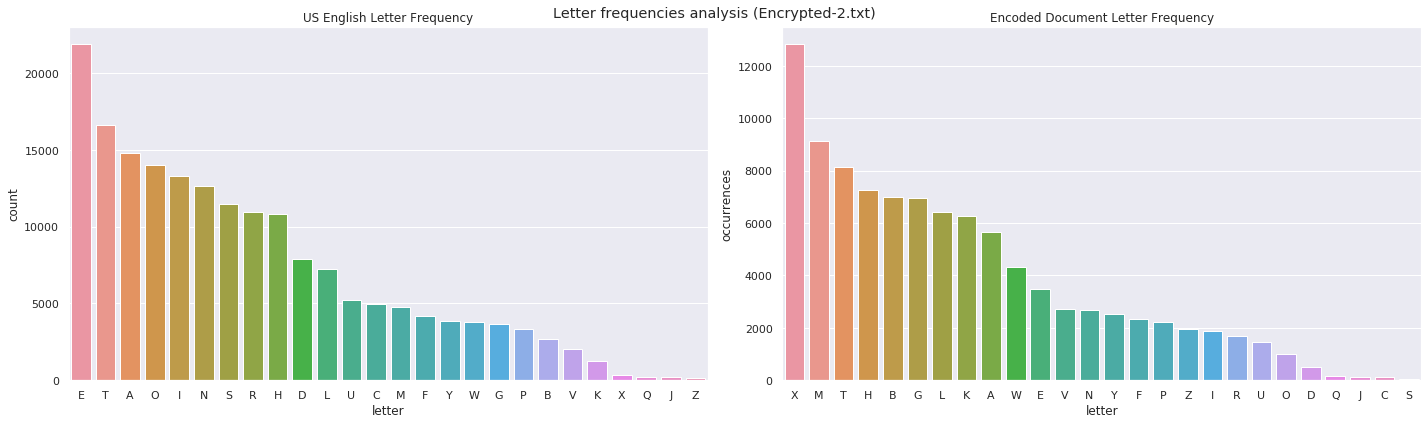

In [15]:
fig, bx = plt.subplots(1, 2)

fig.suptitle('Letter frequencies analysis (Encrypted-2.txt)')

bx[0].set_title('US English Letter Frequency')
bx[1].set_title('Encoded Document Letter Frequency')

sns.barplot(x='letter', y='count', data=en_letters, ax=bx[0])
sns.barplot(x='letter', y='occurrences', data=ceaser_letters, ax=bx[1])

fig.tight_layout()

fig.savefig('../output/images/frequencies_analysis_Encrypted-2.png')

In [16]:
print (f"Shift of the most frequency letter : {ord(ceaser_letters['letter'].head(1).values[0]) - ord(en_letters['letter'].head(1).values[0])}")

Shift of the most frequency letter : 19


### Decoding a sample string using key size provided by the plot
________

In [17]:
sample = "TFHGZLM MAHLX B ATW HVVTLBHG MH VTEE HG TM LM."

print(decrypt(19, sample))

AMONGST THOSE I HAD OCCASION TO CALL ON AT ST.


## Loading letter frequency report file (Encrypted-3.txt)
_______________

In [18]:
dataset = "../resources/Encrypted-3_frequency_letters.csv"

letters = pd.read_csv(dataset)
letters.head(5)

,letter,percentage,occurrences,representations
0,O,0.002932,58,O
1,T,0.074924,1482,T
2,W,0.050000,989,W
3,I,0.040091,793,I
4,F,0.087563,1732,F


### Filtering and Sorting the dataset
______

In [19]:
cond = letters['letter'].str.contains('[A-Z]')
ceaser_letters = letters[cond].copy(deep=True)

ceaser_letters.sort_values(by=['occurrences'],ascending=False, inplace=True)

### Plotting letter analysis
_____

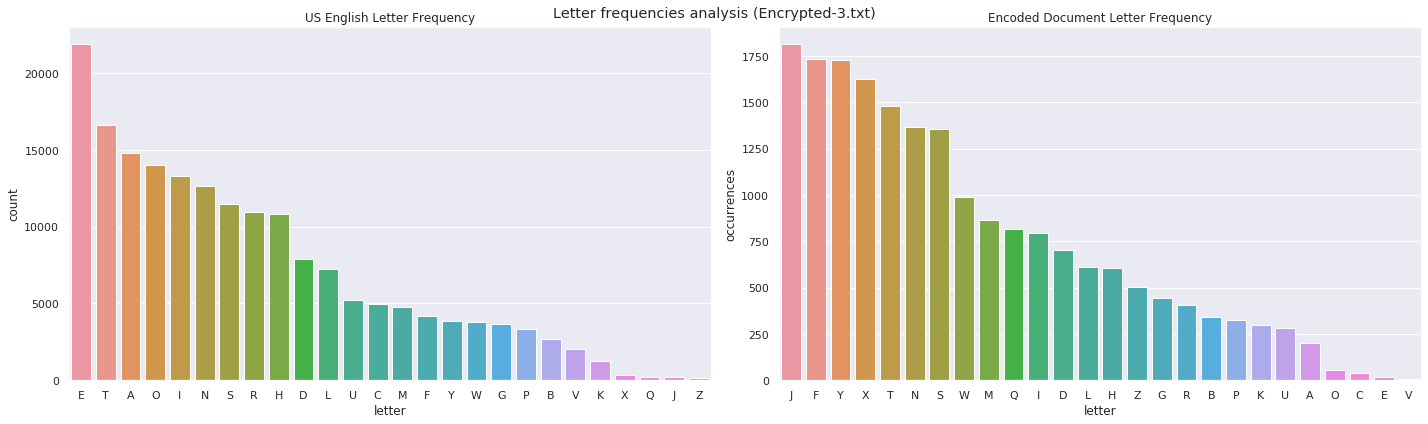

In [21]:
fig, cx = plt.subplots(1, 2)

fig.suptitle('Letter frequencies analysis (Encrypted-3.txt)')

cx[0].set_title('US English Letter Frequency')
cx[1].set_title('Encoded Document Letter Frequency')

sns.barplot(x='letter', y='count', data=en_letters, ax=cx[0])
sns.barplot(x='letter', y='occurrences', data=ceaser_letters, ax=cx[1])

fig.tight_layout()

fig.savefig('../output/images/frequencies_analysis_Encrypted-3.png')

In [22]:
print (f"Shift of the most frequency letter : {ord(ceaser_letters['letter'].head(1).values[0]) - ord(en_letters['letter'].head(1).values[0])}")

Shift of the most frequency letter : 5


### Decoding a sample string using key size provided by the plot
________

In [194]:
sample = "FX SNHP'X YFCN LWTFSX FBFD, LFYXGD FUUJFWX XYWNINSL YMWTZLM"

print(decrypt(5, sample))

AS NICK'S TAXI GROANS AWAY, GATSBY APPEARS STRIDING THROUGH
